In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
import pandas as pd

In [2]:
digit_data=load_digits()

In [3]:
print(digit_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
dir(digit_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digit_data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digit_data.data.shape

(1797, 64)

In [7]:
digit_data.images.shape # Iamge are of 8x8 shape

(1797, 8, 8)

In [8]:
digit_data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Target Images


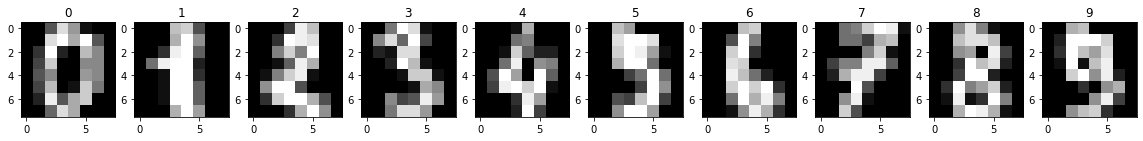

In [10]:
import matplotlib.pyplot as plt
print("Target Images")
fig,ax = plt.subplots(1,10,figsize = (20,20))
ax = ax.ravel()
for i in range(10):
    image = digit_data.images[i]
    ax[i].imshow(image,cmap = 'gray')
    ax[i].set_title(digit_data.target[i])
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
X=mn.fit_transform(digit_data.data)
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,digit_data.target,test_size=0.3,random_state=10)

In [14]:
X_train.shape

(1257, 64)

In [15]:
y_train.shape

(1257,)

In [16]:
model_params={
'svm':{'model':SVC(gamma='auto'),'params':{'C':list(range(1,30,5)),'kernel':['linear','rbf']}},
'random_forest':{
'model':RandomForestClassifier(),
'params':{
'n_estimators':list(range(1,100,5))
}
},
'logistic_regression':{
'model':LogisticRegression(solver='liblinear',multi_class='auto'),
'params':{
'C':list(range(1,30,5))
}
},
'GaussianNB':{
'model':GaussianNB(),
'params':{}
    },
'MultinomialNB':{
'model':MultinomialNB(),
'params':{}
},
'DecisionTree':{
'model':DecisionTreeClassifier(),
'params':{
'criterion' : ["gini", "entropy", "log_loss"],
}
}
}

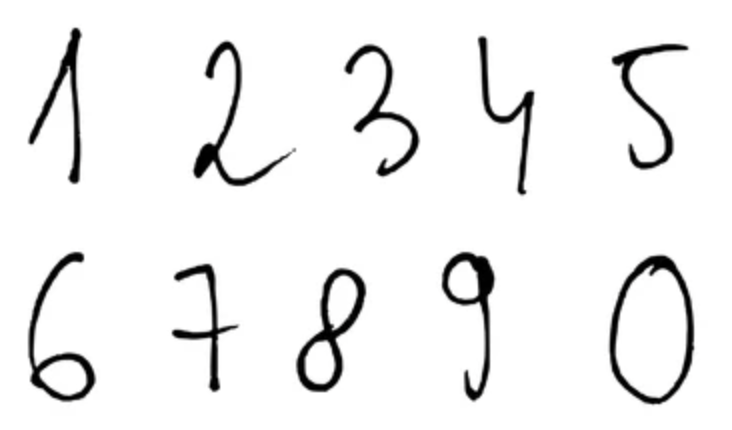

In [30]:
from IPython import display
display.Image("handwrittennumber.png",width=400,height=400)

In [22]:
score=[]
for model,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=6,return_train_score=False)
    clf.fit(X,digit_data.target)
    score.append({'mobel':model,'best_score':clf.best_score_,'best_pramas':clf.best_params_})

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/

In [23]:
result=pd.DataFrame(score)
result

,mobel,best_score,best_pramas
0,svm,0.963276,"{'C': 6, 'kernel': 'rbf'}"
1,random_forest,0.957157,{'n_estimators': 66}
2,logistic_regression,0.937679,{'C': 16}
3,GaussianNB,0.804705,{}
4,MultinomialNB,0.874812,{}
5,DecisionTree,0.824688,{'criterion': 'entropy'}


In [24]:
#11 RandomizedSearchCV
score_rand=[]
for model,mp in model_params.items():
    clf=RandomizedSearchCV(mp['model'],mp['params'],cv=6,return_train_score=False,n_iter=1)
    clf.fit(X,digit_data.target)
    score_rand.append({'mobel':model,'best_score':clf.best_score_,'best_pramas':clf.best_params_})

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/

KeyError: 'log_loss'

In [25]:
#12 RandomizedSearchCV Report
result_rand=pd.DataFrame(score_rand)
result_rand

,mobel,best_score,best_pramas
0,svm,0.963274,"{'kernel': 'rbf', 'C': 11}"
1,random_forest,0.954378,{'n_estimators': 86}
2,logistic_regression,0.937679,{'C': 16}
3,GaussianNB,0.804705,{}
4,MultinomialNB,0.874812,{}


In [26]:
#13 Now Using SVC
model=SVC(C=6,kernel='rbf')
model.fit(X_train,y_train)

SVC(C=6)

In [27]:
#14 Checkin For Overfitting
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Training accuracy: ",accuracy_score(y_train,model.predict(X_train)))
print("Testing accuracy: ",accuracy_score(y_test,model.predict(X_test)))

Training accuracy:  1.0
Testing accuracy:  0.987037037037037


Text(51.0, 0.5, 'True Digits')

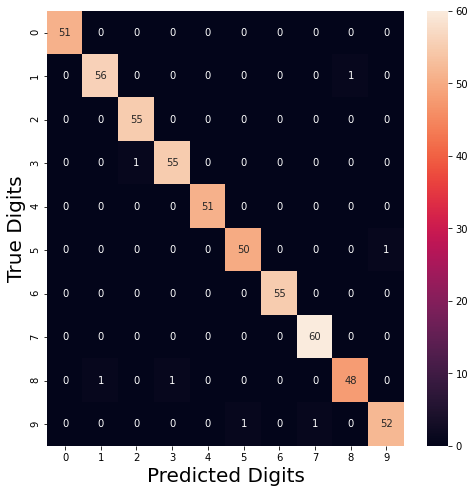

In [29]:
#15 Classification Visulization Uing Confusion Matrix
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True)
plt.xlabel("Predicted Digits",fontdict={"size":20})
plt.ylabel("True Digits",fontdict={"size":20})